# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
#According to the instructor Eli
df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice.
print(len(df['Mouse ID'].unique()))

249


In [31]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = df[df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()

In [37]:
# Optional: Get all the data for the duplicate mouse ID. 
df_clean = df.loc[df['Mouse ID'].isin(duplicate_mice)]
#df_clean.head()
#df_clean = df[df['Mouse ID'].isin(duplicate_mice)]

# Display the filtered DataFrame
df_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#according to the instructor
df_clean = df.loc[df["Mouse ID"] != "g989"]
df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [14]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = df_clean['Mouse ID'].nunique()
print(num_unique_mice)

248


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Eli says use st.sem to get the stnadard error
#import pandas as pd
#import scipy.stats as stats
mean_tumor_volume = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_volume = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_tumor_volume = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

# Calculate standard deviation and SEM using groupby and apply
std_tumor_volume = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_tumor_volume = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(stats.sem)

# Create a DataFrame to store the summary statistics
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': var_tumor_volume,
    'Tumor Volume Std. Dev.': std_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

# Display the summary statistics DataFrame
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [42]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])

# Compute SEM separately
summary_stats['SEM'] = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(stats.sem)

# Rename columns for clarity
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Display the summary statistics DataFrame
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

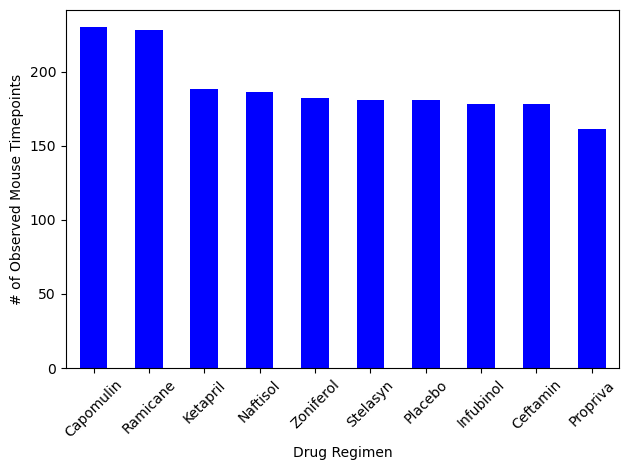

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import pandas as pd
import matplotlib.pyplot as plt

# Group the DataFrame by 'Drug Regimen' and count the number of rows
regimen_counts = df['Drug Regimen'].value_counts()

# Create a bar plot using Pandas built-in plot function
regimen_counts.plot(kind='bar', color='blue')

# Add labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


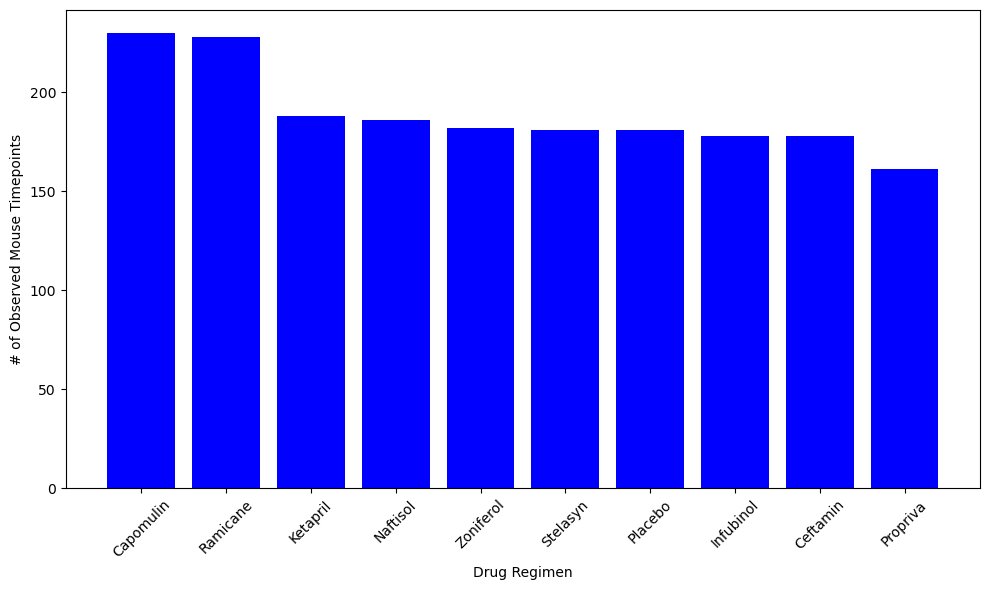

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with columns 'Drug Regimen', 'Mouse ID', and 'Timepoint'

# Group the DataFrame by 'Drug Regimen' and count the number of rows
regimen_counts = df['Drug Regimen'].value_counts()

# Extract drug regimen names and corresponding counts
regimen_names = regimen_counts.index
counts = regimen_counts.values

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_names, counts, color='blue')

# Add labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


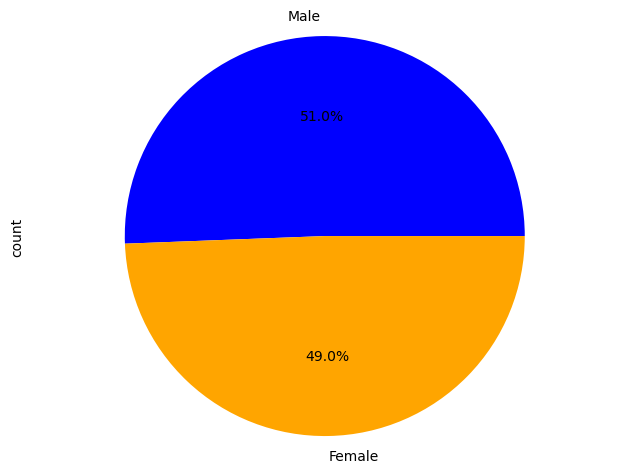

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd
import matplotlib.pyplot as plt
import math
# Assuming you have a DataFrame named df with a column 'Sex' indicating the gender of mice

# Count the number of mice for each gender
gender_counts = df['Sex'].value_counts()

# Create a pie plot using Pandas built-in plot function
gender_counts.plot(kind='pie', autopct=lambda x: f'{int(x + 0.5):.1f}%', colors=['blue', 'orange'], startangle=0)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.tight_layout()
plt.show()


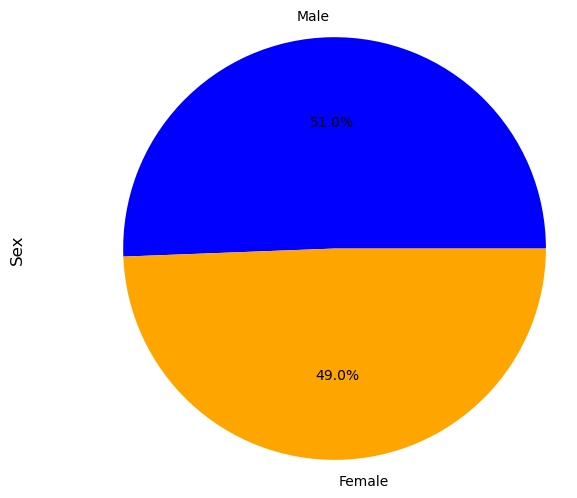

In [98]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with a column 'Sex' indicating the gender of mice

# Count the number of mice for each gender
gender_counts = df['Sex'].value_counts()

# Create labels for the pie plot
labels = gender_counts.index

# Create data for the pie plot
sizes = gender_counts.values

# Define colors for each gender
colors = ['blue', 'orange']

# Create a pie plot using pyplot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda x: f'{int(x + 0.5):.1f}%', startangle=0)

plt.text(-1.5, 0, 'Sex', ha='center', va='center', fontsize=12, rotation='vertical')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()


## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame to include only the rows corresponding to the four treatment regimens
filtered_df = df[df['Drug Regimen'].isin(treatment_regimens)]

# Group the filtered DataFrame by 'Mouse ID' and find the final tumor volume for each mouse
final_tumor_volumes = filtered_df.groupby('Mouse ID')['Tumor Volume (mm3)'].last().tolist()

# Print the list of final tumor volumes
print("Final Tumor Volumes:", final_tumor_volumes)


Final Tumor Volumes: [67.97341878, 65.52574285, 62.99935619, 38.4076183, 43.0475426, 38.81036633, 57.03186187, 32.97852192, 66.08306589, 38.98287774, 45.0, 56.05774909, 38.93963263, 55.74282869, 72.2267309, 36.3213458, 38.34200823, 33.39765251, 60.96971133, 37.31123552, 62.43540402, 40.65900627, 60.91876652, 48.72207785, 30.48598484, 37.07402422, 40.1592203, 29.12847181, 47.7846818, 33.56240217, 36.37451039, 67.28962147, 47.68596303, 37.31184577, 38.1251644, 38.75326548, 61.84902336, 31.56046955, 36.13485243, 68.92318457, 22.05012627, 66.19691151, 62.11727887, 67.74866174, 57.91838132, 41.48300765, 46.78453491, 59.85195552, 64.29983003, 38.84687569, 30.56462509, 28.43096411, 47.01036401, 33.32909778, 31.09533505, 60.16518046, 59.74190064, 55.62942846, 45.69933088, 61.43389223, 54.65654872, 64.19234114, 45.22086888, 36.56165229, 46.53920617, 32.37735684, 37.22565033, 43.41938077, 41.58152074, 55.65068132, 23.34359787, 30.27623175, 40.72857787, 34.45529799, 45.0, 52.92534846, 45.0, 40.66

In [75]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_tumor_volumes = final_tumor_volumes[final_tumor_volumes.index.isin(filtered_df[filtered_df['Drug Regimen'] == treatment]['Mouse ID'])]
    
    # Add subset to the list
    tumor_volumes_data.append(treatment_tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = treatment_tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Check for outliers
    outliers = treatment_tumor_volumes[(treatment_tumor_volumes < lower_bound) | (treatment_tumor_volumes > upper_bound)]
    
    # Print potential outliers
    print(f"{treatment}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


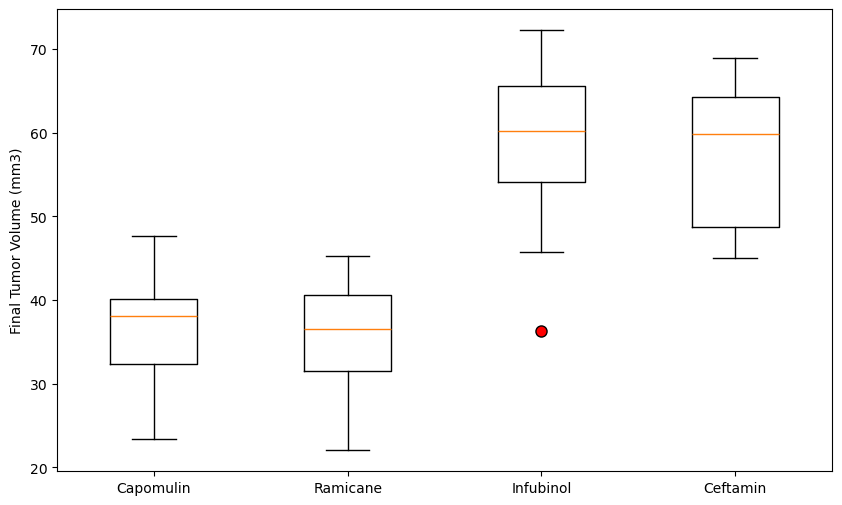

In [78]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a boxplot
plt.figure(figsize=(10,6))
#plt.boxplot(tumor_volumes_data, labels=treatments)
plt.boxplot(tumor_volumes_data, labels=treatments, showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))


# Add label
plt.ylabel('Final Tumor Volume (mm3)')


# Show plot
plt.show()


## Line and Scatter Plots

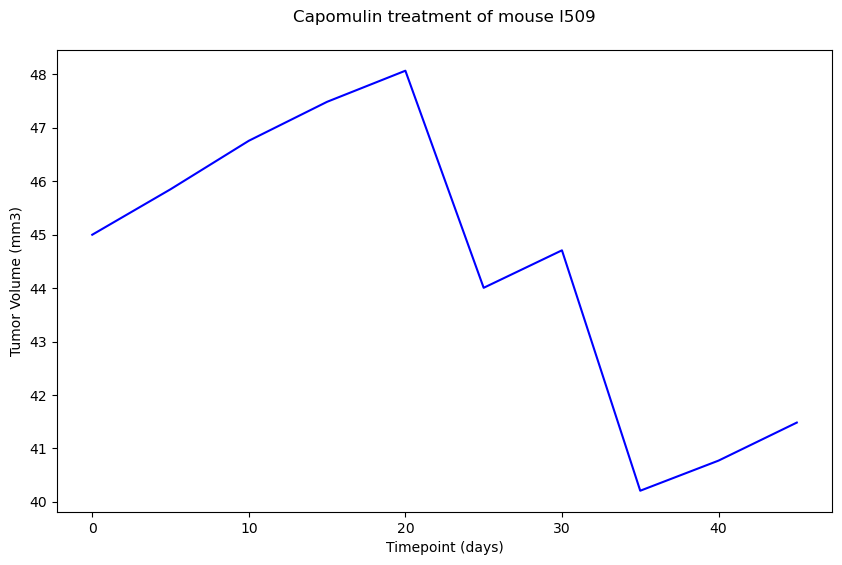

In [88]:
import matplotlib.pyplot as plt

# Filter the DataFrame for mice treated with Capomulin
capomulin_df = df[df['Drug Regimen'] == 'Capomulin']

# Choose a single mouse from the filtered DataFrame
selected_mouse_id = 'l509'  # Example mouse ID
selected_mouse_data = capomulin_df[capomulin_df['Mouse ID'] == selected_mouse_id]

# Plot tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10,6))
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], color='b')

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {selected_mouse_id}', loc='center', pad=20)

# Show plot
plt.show()



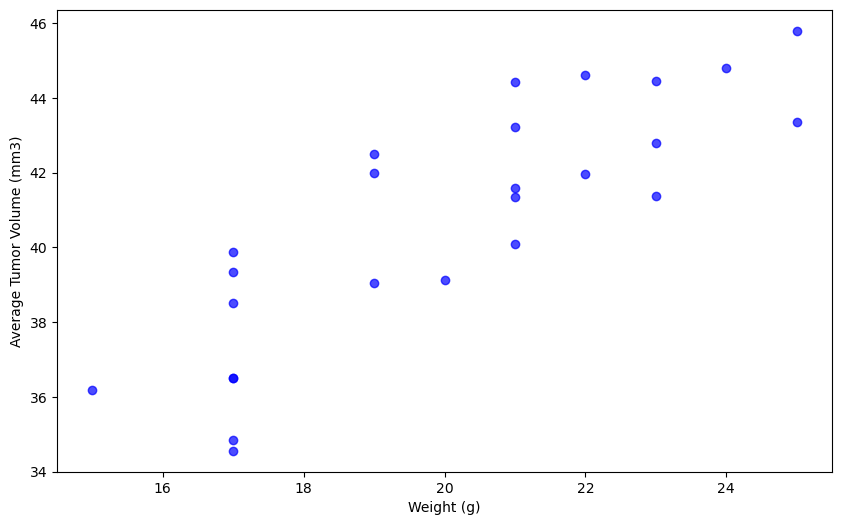

In [90]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Group the Capomulin data by Mouse ID to calculate average tumor volume and weight
capomulin_grouped = df[df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'], color='b', alpha=0.7)

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


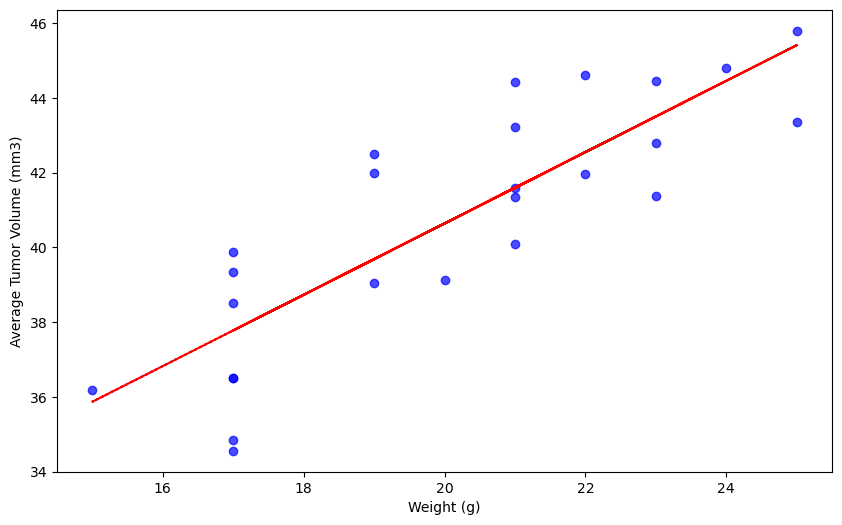

In [96]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Group the Capomulin data by Mouse ID to calculate average tumor volume and weight
capomulin_grouped = df[df['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Extract weight and tumor volume data
weight = capomulin_grouped['Weight (g)']
tumor_volume = capomulin_grouped['Tumor Volume (mm3)']

# Calculate correlation coefficient
correlation = weight.corr(tumor_volume)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(weight, tumor_volume)
regress_values = weight * slope + intercept

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(weight, tumor_volume, color='b', alpha=0.7)
plt.plot(weight, regress_values, color='r', linestyle='--')

# Add labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add correlation coefficient to the plot
print(f'The correlation between mouse weight and the average tumor volume is {correlation:.2f}')
# Show plot
plt.show()
